In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
so_survey_df = pd.read_csv(r"../input/feml-dataset/Combined_DS_v10.csv")
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


- Extract `numeric_features`.

In [3]:
so_numeric_df = so_survey_df[so_survey_df.select_dtypes(include = ['int', 'float']).columns]
so_numeric_df.head()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7


## 1. Data distributions
An important consideration before building a machine learning model is to understand what the distribution of your underlying data looks like. A lot of algorithms make assumptions about how your data is distributed or how different features interact with each other. 

For example almost all models besides tree based models require your features to be on the same scale. 

`Feature engineering` can be used to manipulate your data so that it can fit the assumptions of the distribution, or at least fit it as closely as possible.
### 1.1. Theory
#### Distribution assumptions
Almost every model besides tree based models assume that your data is normally distributed. 

`Normal distributions` follow a bell shape like shown here, the main characteristics of a normal distribution is that `68 percent` of the data lies within `1 standard deviation` of the `mean,95% percent` lies within `2 standard deviations` from the mean and `99.7% fall within 3 standard deviations` from the mean.

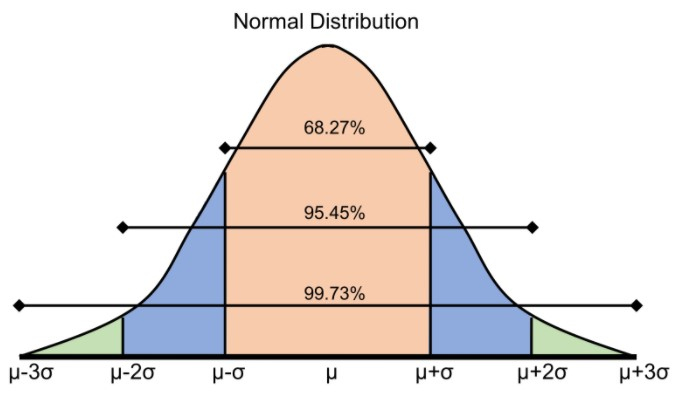

In [4]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Observing your data
To understand the shape of your own data you can create histograms of each of the continuous features. 

- To do so, once you have the [matplotlib](https://matplotlib.org/stable/index.html) library loaded, along with your DataFrame, run `hist()` on your data frame followed by calling plt dot show to observe the graph. 

Here we see the first column has a fairly normal looking distribution, but the second looks quite different, with the majority of the data skewed to the lower values. 

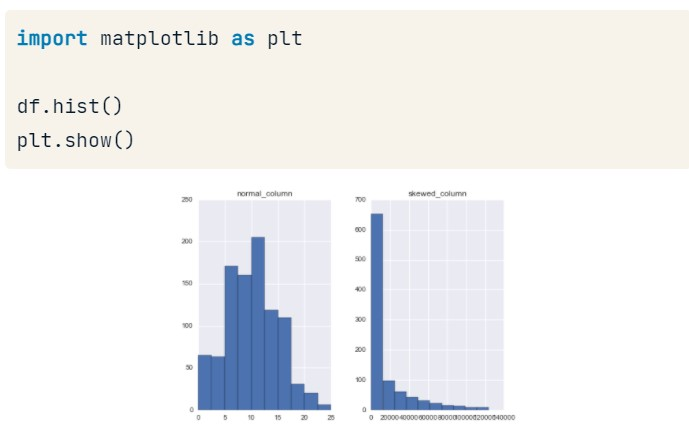

In [5]:
## Hình minh họa Image(fig1, height, width)

This is also referred to having a long right tail.

#### Delving deeper with box plots
While histograms can be useful to show the high level distribution of the data, it does not show details such as where the `middle chunk` of your data sits in an easily readable fashion. 

For this you can use the box plot. 

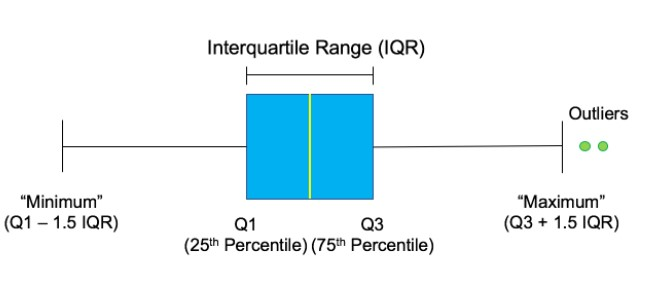

In [6]:
## Hình minh họa Image(fig1, height, width)

The box plot shows the distribution of the data by calculating where the `middle 50%` of the data sits, this is also known as the Inter quartile range or `IQR` (it sits between the `1st` and `3rd quartile`) and marking it with the box. The whiskers extend to the minimum of 1.5 times the IQR from the edge of the box or the maximum range of the data. 

Any points outside this are marked as outliers. This can be useful to also see if there are points in your data set that may be unwanted outliers.

#### Box plots in pandas
To create a box plot in pandas, you can call the `boxplot() `method on a list of columns you wish to plot.

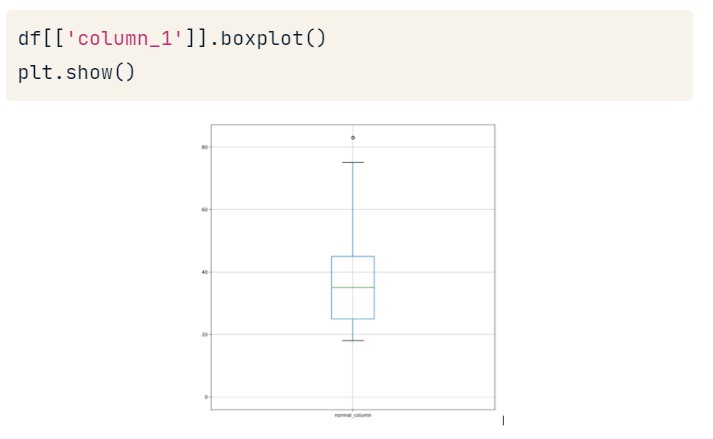

In [7]:
## Hình minh họa Image(fig1, height, width)

#### Paring distributions
One final approach to looking at the distribution of data is to examine how different features in your DataFrame interact with each other. 

This type of chart is called a pairplot and can be useful to see if multiple columns are correlated with each other or whether they have any association at all. 

To generate a pairplot, 
- first you need to import the seaborn package and 
- then call the pairplot() function on your DataFrame. 

In this example we can see that the first and last columns are somewhat related.

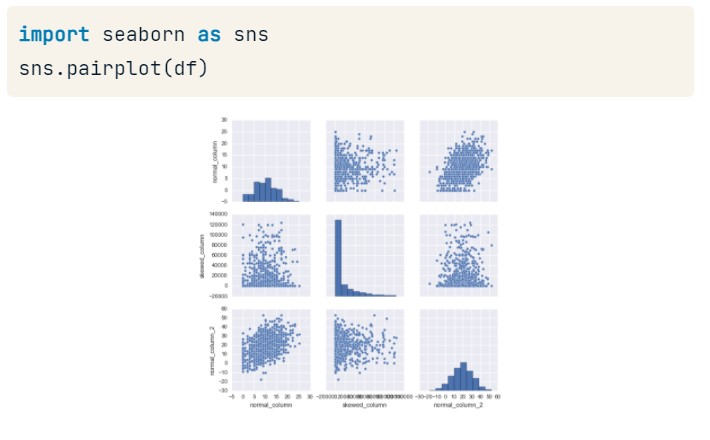

In [8]:
## Hình minh họa Image(fig1, height, width)

#### Further details on your distributions
While all these plots are very useful to get an understanding of your data's shape, you will at times want to quickly get summary statistics of your data's distribution. 

This can be found using the `describe() method` as seen here on the same dummy data set we have been using to demonstrate the plots.

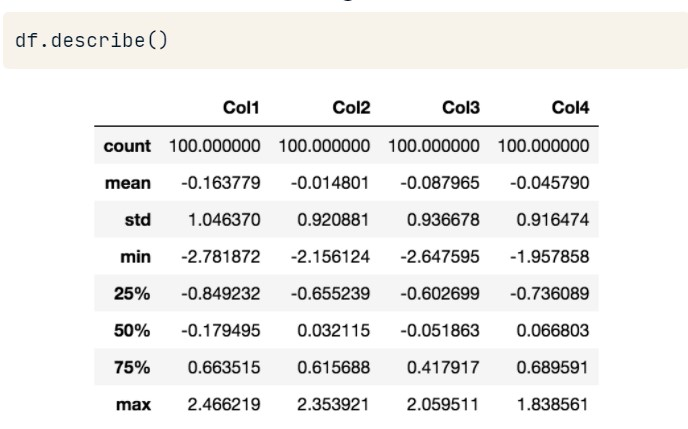

In [9]:
## Hình minh họa Image(fig1, height, width)

### 1.2. PRACTICES
#### Exercise 1.2.1. What does your data look like? (I)
Up until now you have focused on creating new features and dealing with issues in your data. **Feature engineering** can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.

Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. 

In this exercise, you will create plots to examine the distributions of some numeric columns in the `so_survey_df` DataFrame, stored in `so_numeric_df`.
#### SOLUTION
- Create a histogram.

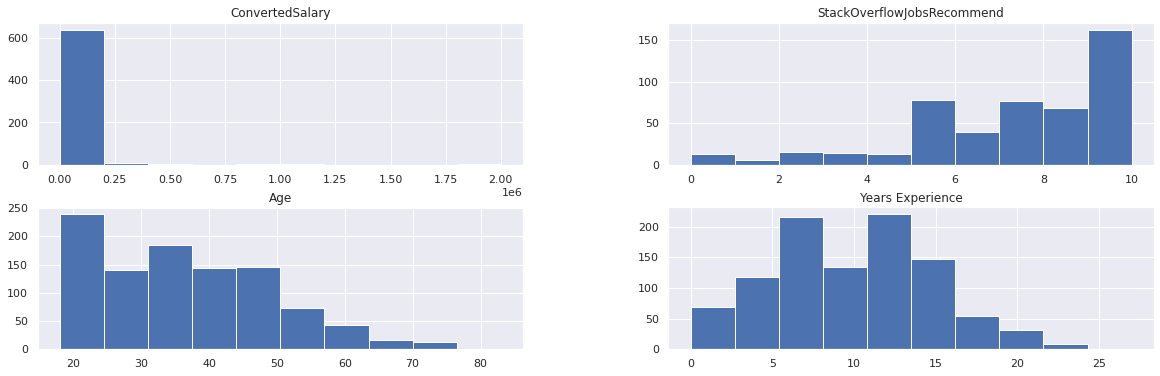

In [10]:
so_numeric_df.hist(figsize = (20, 6))
plt.show()

- Create a boxplot of two columns

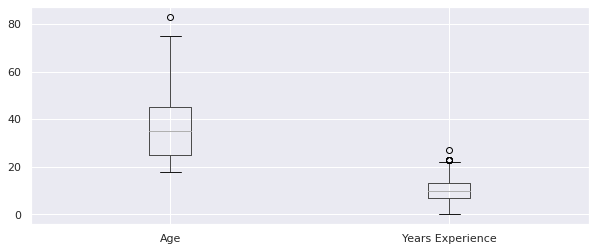

In [11]:
so_numeric_df[['Age', 'Years Experience']].boxplot(figsize = (10, 4))
plt.show()

- Create a boxplot of `ConvertedSalary`.

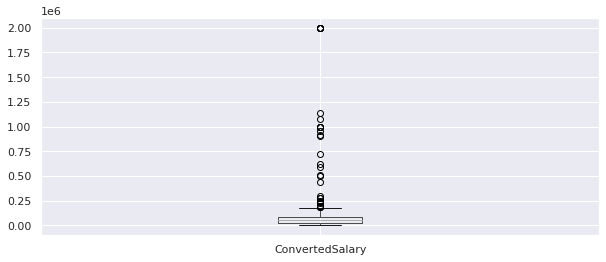

In [12]:
so_numeric_df[['ConvertedSalary']].boxplot(figsize = (10, 4))
plt.show()

#### Exercise 1.2.2. What does your data look like? (II)
In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

#### SOLUTION.
- Step 1.

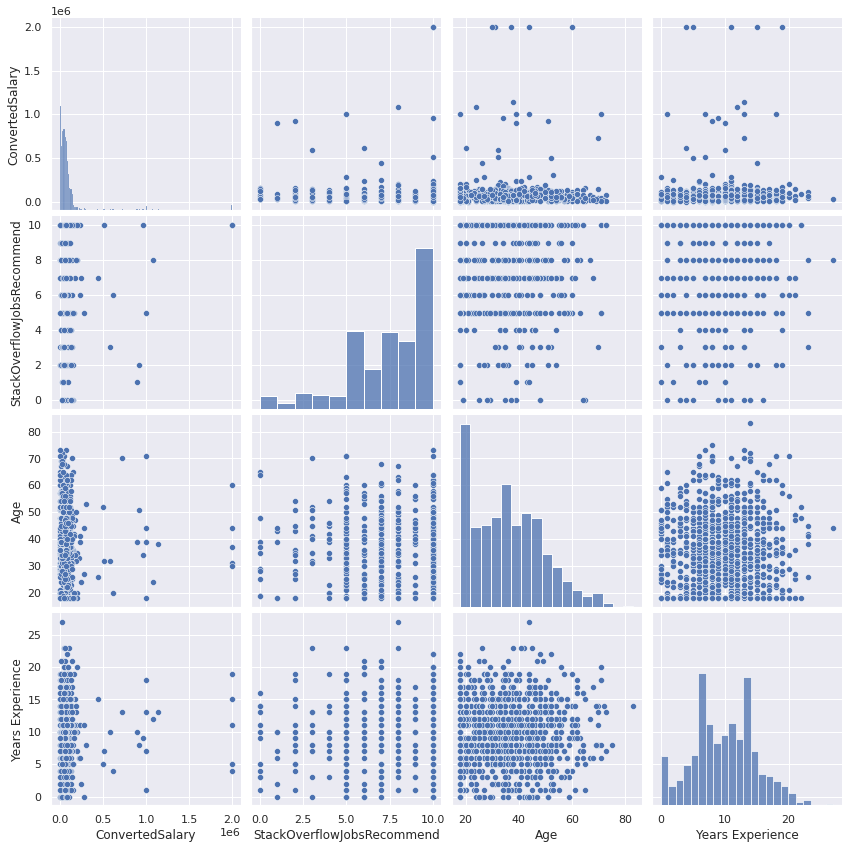

In [13]:
# Plot pairwise relationships
sns.pairplot(so_numeric_df, height = 3)

# Show plot
plt.show()

- Print summary statistics

In [14]:
so_numeric_df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,6.650000e+02,487.000000,999.000000,999.000000
mean,9.256517e+04,7.061602,36.003003,9.961962
std,2.091344e+05,2.621591,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,2.755000e+04,5.000000,25.000000,7.000000
50%,5.556200e+04,7.000000,35.000000,10.000000
75%,8.823800e+04,10.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


#### Exercise 1.2.3. When don't you have to transform your data?
While making sure that all of your data is on the same scale is advisable for most analyses, for **which** of the following `machine learning models` is **normalizing data not always necessary?**

>- A. K-Means
>- B. Decision Trees
>- C. Linear Regression
>- D. K-nearest neighbors


#### Answers.
>- A. Incorrect! `K-means` uses euclidean distance to measure the distance to the seed points, giving incorrect groups if data is not evenly scaled.
>- **B. Correct!** As `decision trees` split along a singular point, they do not require all the columns to be on the same scale.
>- C. Incorrect, features with larger scales may influence a model excessively when not normalized.
>- D. Incorrect, `KNN` uses euclidean distance to measure distance to the neighborhood points, giving incorrect groups if data is not evenly scaled.

## 2. Scaling and transformations
### 2.1. Theory
As mentioned in the last video, most machine learning algorithms require your data to be on the same scale for them to be effective,
#### Scaling data
For example it is difficult to compare salary values (often measured in thousands) with ages as shown here. While this assumption of similar scales is necessary, it is rarely true in real world data.

For this reason you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this but we will discuss the two most commonly used approaches here, `Min-Max scaling` (sometimes referred to as normalization), and **standardization**.

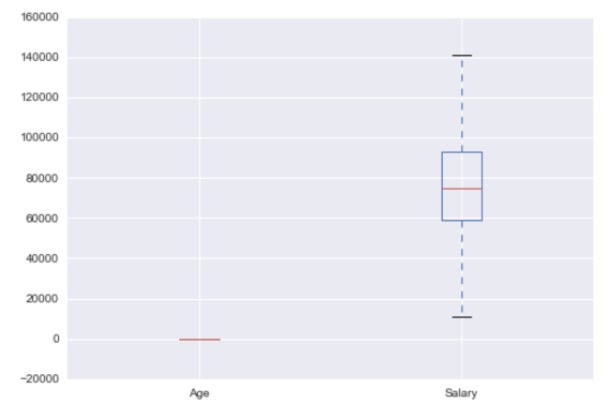

In [15]:
## Hình minh họa Image(fig1, height, width)

#### Min-Max scaling
Min-Max scaling is when your data is scaled linearly between a minimum and maximum value, often 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest. 

As it is a linear scaling while the values will change, the distribution will not. Take for example the `Age` column from the stackoverflow dataset, the raw values lie between 20 and 80, approximately.

While here after `min-max scaling`, although the distribution is the same, the values sit fully between 0 and 1.

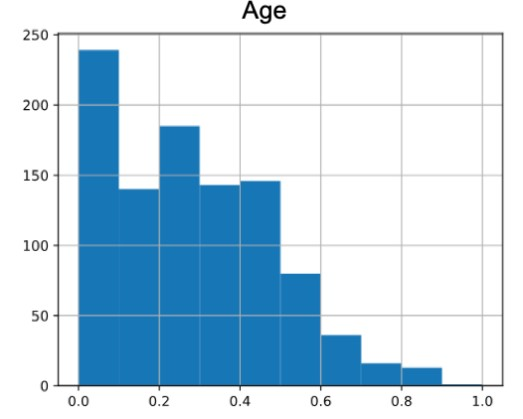

In [16]:
## Hình minh họa Image(fig1, height, width)

#### Min-Max scaling in Python
- To implement this on your data set, you first need to import `MinMaxScaler` from `scikit learn's preprocessing module`, scikit learn is the most commonly used machine learning library for python.
- You then instantiate the `MinMaxScaler()` and `fit` it to your data. This tells the scaler how it should scale values when it performs the transformation. 
- Finally, you need to actually transform the data with this new fitted scaler. Note that as this scaler assumes the max value it is created with is your upper bound, new data from outside this range may create unforeseen results.

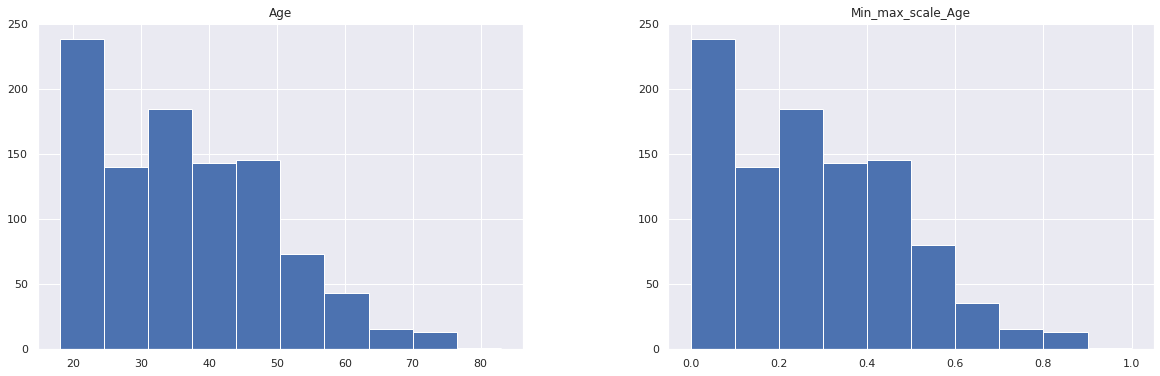

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler()
mm_scale.fit(df[['Age']])
df['Min_max_scale_Age'] = mm_scale.transform(df[['Age']])
df[['Age','Min_max_scale_Age']].hist(figsize = (20, 6))
plt.show()

#### Standardization
The other commonly used scaler is called **standardization**. 

As opposed to finding an outer boundary and squeezing everything within it, standardization instead finds the mean of your data and centers your distribution around it, calculating the number of standard deviations away from the mean each point is. 

These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to the maximum and minimum values as you can see here.

In [18]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

#### Standardization in Python
You can apply standardization in a similar fashion to how the min-max scaler was implemented. 
- You first import `StandardScaler` from `scikit-learn`, instantiate and then 
- Fit it on your data. Once fitted you can apply it to your data.

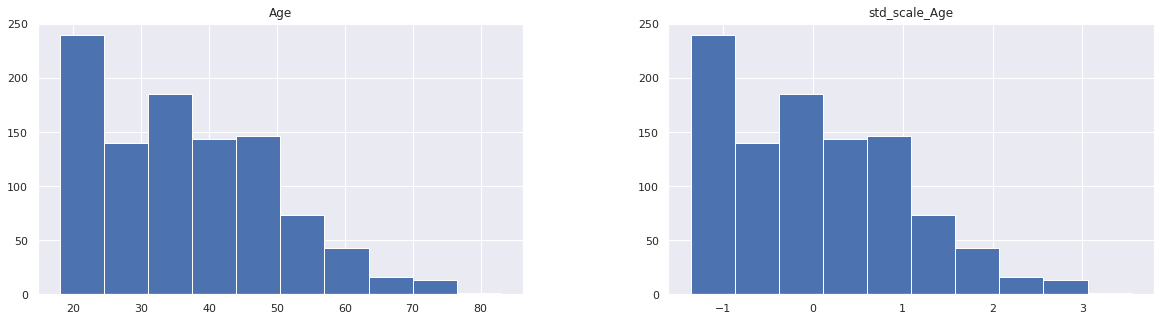

In [19]:
std_scale.fit(df[['Age']])
df['std_scale_Age'] = std_scale.transform(df[['Age']])
df[['Age','std_scale_Age']].hist(figsize = (20, 5))
plt.show()

#### Log Transformation
Both normalization and min-max scaling are types of scalers, in other words the data remained in the same shape but was squashed or scaled. 

A `log transformation` on the other hand can be used to make highly skewed distributions less skewed. Take for example one of the salary columns from the stack overflow dataset shown here where there is a very long right tail.

#### Log transformation in Python
Although it effects your data quite differently, a log transformation is implemented in `Python` the same way you have implemented scalers. To use a `log transform` you first import `PowerTransformer` from `sklearn's preprocessing` module, then you fit it to your dataset, and once fitted you can transform your data. 

`Log transformation` is a type of `power transformation`, hence the name.

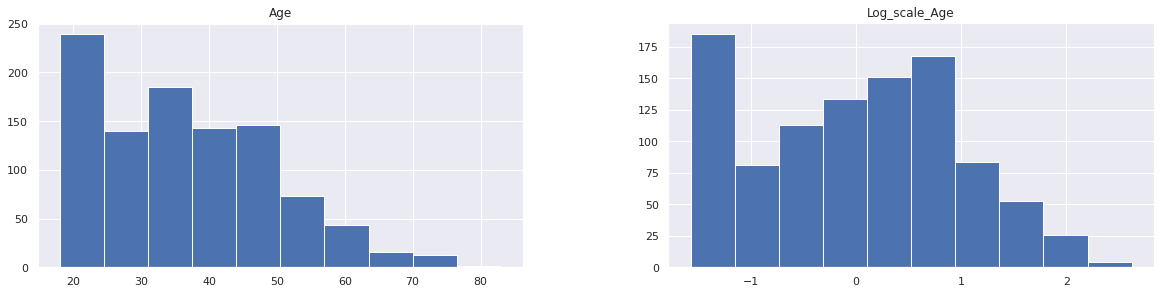

In [20]:
from sklearn.preprocessing import PowerTransformer
log_scale = PowerTransformer()
log_scale.fit(df[['Age']])
df['Log_scale_Age'] = log_scale.transform(df[['Age']])
df[['Age','Log_scale_Age']].hist(figsize = (20, 4.5))
plt.show()

### 2.2. PRACTICE.
#### Exercise 2.2.1. Normalization
As discussed in the theory, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.

When using scikit-learn (the most commonly used machine learning library in `Python`) you can use a `MinMaxScaler` to apply `normalization`. (It is called this as it scales your values between a minimum and maximum value.)
#### SOLUTION

In [21]:
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df[['Years Experience']])

# Transform the data using the fitted scaler
df['Years Experience_MM'] = MM_scaler.transform(df[['Years Experience']])

# Compare the origional and transformed column
print(df[['Years Experience_MM', 'Years Experience']].head())

   Years Experience_MM  Years Experience
0             0.481481                13
1             0.333333                 9
2             0.407407                11
3             0.444444                12
4             0.259259                 7


#### Exercise 2.2.2. Standardization
While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. 

One commonly used solution to this is called **standardization**, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.
#### SOLUTION.

In [22]:
# Instantiate MinMaxScaler
SS_scaler = StandardScaler()

# Fit MM_scaler to the data
SS_scaler.fit(df[['Years Experience']])

# Transform the data using the fitted scaler
df['Years Experience_SS'] = SS_scaler.transform(df[['Years Experience']])

# Compare the origional and transformed column
print(df[['Years Experience_SS', 'Years Experience']].head())

   Years Experience_SS  Years Experience
0             0.623099                13
1            -0.197298                 9
2             0.212901                11
3             0.418000                12
4            -0.607496                 7


#### Exercise 2.2.3. Log transformation
In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. 

On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a `log transform` on the `ConvertedSalary` column in the `df DataFrame` as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.

#### SOLUTION

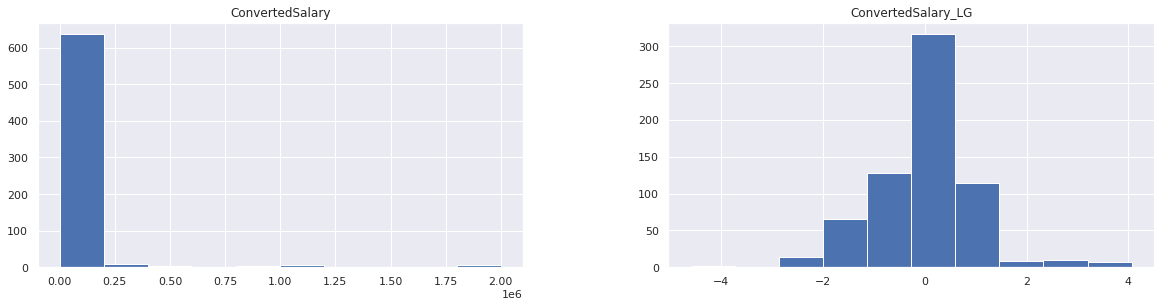

In [23]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df[['ConvertedSalary']])

# Apply the power transform to the data
df['ConvertedSalary_LG'] = pow_trans.transform(df[['ConvertedSalary']])

# Plot the data before and after the transformation
df[['ConvertedSalary', 'ConvertedSalary_LG']].hist(figsize = (20, 4.5))
plt.show()

**Comments.** `ConvertedSalary_LG` column looks much more normal than the original `ConvertedSalary` column.

#### Exercise 2.2.4. When can you use normalization?
When could you use normalization (`MinMaxScaler`) when working with a dataset?
>- A. When you know that your data may have outliers.
>- B. When you know the the data has a strict upper and lower bound.
>- C. When you know that your test data may contain smaller values than your training data.
>- D. When you know that your test data may contain larger values than your training data.

#### Answers.
>- A. Incorrect, `normalization` can be **negatively effected** by the outliers.
>- **B. Correct!** `Normalization` scales all points linearly between the upper and lower bound.
>- C or D. Incorrect, `normalization` will set the upper and lower bounds based on the training data.

## 3. Removing outliers
You will often find that even after performing these transformations, your data is still very skewed. This can often be caused by outliers existing in your data.
### 3.1. Theory
#### What are outliers?
`Outliers` are data points that exist far away from the majority of your data. 

This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. 

An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the `lower bound`.

#### Quantile based detection
The first approach we will discuss is to remove a certain percentage of the largest and/or smallest values in your data. 

For example, you could remove the top `5%`. This is achieved by finding the 95th quantile (the point below which `95%` of your data resides) and removing everything above it. 

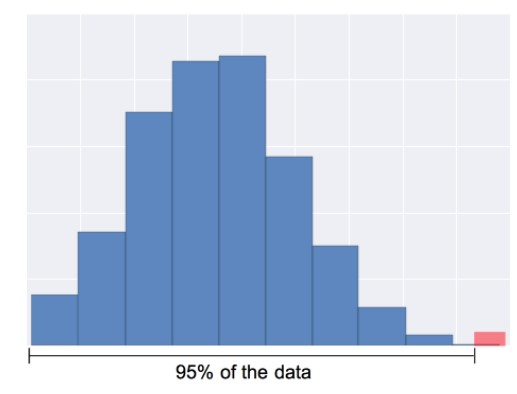

In [24]:
## Hình minh họa Image(fig1, height, width)

This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no real outliers, you will still be removing the top 5% of values from the dataset.

#### Quantiles in Python
To find the 95th quantile, you can call the `quantile()` method with `0.95` as the argument on the column. 

In [25]:
q_cut_off = df['Age'].quantile(0.95)
q_cut_off

60.0

You can then create a mask to find which values lie below the 95th quantile and subset the data accordingly.

In [26]:
mask = df['Age'] < q_cut_off
trimmed_df = df[mask]

print('df_shape : \t', df.shape)
print('trimmed_df_shape:', trimmed_df.shape)

df_shape : 	 (999, 10)
trimmed_df_shape: (943, 10)


#### Standard deviation based detection
An alternative, and perhaps more statistically sound method of removing outliers is to instead choose what you consider to be outliers based on the mean and standard deviations of the data set. 

For example you may want to eliminate all data greater than `3 standard deviations` from the mean as you expect those data points to be outliers. 

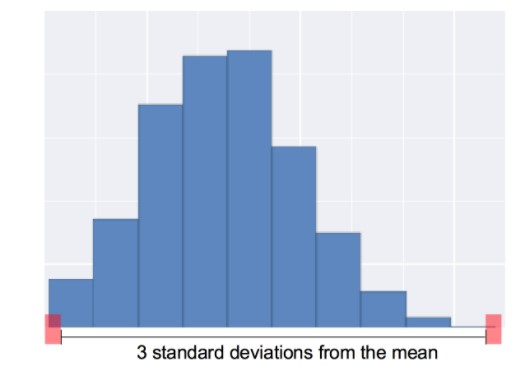

In [27]:
## Hình minh họa Image(fig1, height, width)

This approach has the benefit of only removing genuinely extreme values, for example if only one value was an outlier, only that value would be effected.

#### Standard deviation detection in Python.
- To apply this in Python, you first need to find the mean and standard deviation of your column by calling the mean() and std() methods on the column, respectively. 
- Then find upper bound by adding 3 times the standard deviation to the mean and similarly find the lower bound by subtracting 3 times the standard deviation from the mean. 

In [28]:
mean = df['Age'].mean()
std = df['Age'].std()
cut_off = 3*std

low, upp = mean - cut_off, mean + cut_off

mask = (df['Age'] < upp) & (df['Age'] > low)

new_df = df[mask]

Once you have found these bounds, you can apply these bounds as a mask to the DataFrame as shown here. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

### 3.2. PRACTICE
#### Exercise 3.2.1. Percentage based outlier removal
One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. 

This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided.

When using this approach, you must remember that even if there are no outliers, this will still remove the same top `N percentage` from the dataset.
#### SOLUTION

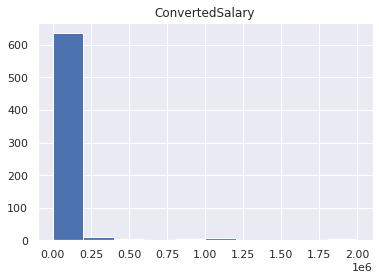

<Figure size 432x288 with 0 Axes>

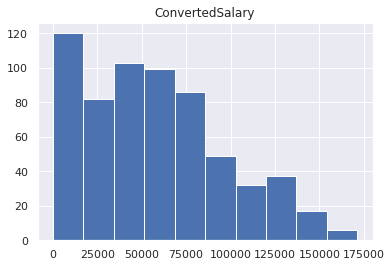

In [29]:
# Find the 95th quantile
quantile = df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

#### Exercise 3.2.2. Statistical outlier removal
While removing the top `N%` of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. 

A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean.

You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. 

This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.
#### SOLUTION

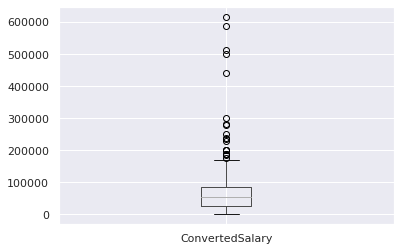

In [30]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) 
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

## 4. Scaling and transforming new data
One of the most important aspects of machine learning is the actual application of any model you create on a new data set. For example if you built a model based on historical data, ultimately you will want to apply this model on new data to make predictions.
### 4.1. Theory
#### Reuse training scalers
How you go about doing this depends on what transformations you make to the dataset before you fit the model. 

For example, if you applied the `StandardScaler()` to your data before fitting the model, you need to make sure you transform the test data using the same scalar before making predictions. 

In [31]:
scaler = StandardScaler()

scaler.fit(train_df['col'])
train['scale_col'] = scaler.transform(train_df['col'])

# Fit some model
test_df['scale_col'] = scaler.transform(test_df['col'])

Please do note that the scaler is fitted only on the training data. That is, you fit and transform the training data, but only transform the test data.

#### Training transformations for reuse
Similarly, if you intend to remove outliers from your test set, you should use the thresholds found on your train set to do so. If you were to use the mean and standard deviation of the test set, it could negatively impact your predictions.

Note that it is only in very rare cases that you would want to remove outliers from your test set.

In [32]:
train_mean = train_df['col'].mean()
train_std = train_df['col'].std()

cut_off = train_std * 3
train_low_cut, train_upp_cut = train_mean - cut_off, train_mean + cut_off

mask = (test_df['col'] < train_upp_cut) & (test_df['col'] > train_low_cut)

trimmed_test = test[mask]

#### Why only use training data?
So why did we not refit the scaler on the test data or use thresholds from the test data? To avoid data leakage. In real life, you won't have access to the test data, that is, when you have deployed your model in production, you won't have access to future data, so you can't rely on it to make predictions and assess model performance.

#### Avoid data leakage!
Thus, you should always make sure you calibrate your preprocessing steps only on your training data or else you will overestimate the accuracy of your models

In [36]:
so_train_numeric = so_numeric_df.iloc[:700, :].copy()
so_test_numeric = so_numeric_df.iloc[700:, :].copy()

### 4.2. PRACTICES
#### Exercise 4.4.1. Train and testing transformations (Part. I)
Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. 

Once again you should ensure that you use the `thresholds` calculated only from the train set to remove outliers from the test set.

#### SOLUTION

In [38]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

#### Exercise 4.2.2. Train and testing transformations (Part. II)
So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.

To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. 

You should never retrain a scaler on the test set.

#### SOLUTION

In [39]:
# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
700   35 -0.069265
701   18 -1.343218
702   47  0.829997
703   57  1.579381
704   41  0.380366
